<a href="https://colab.research.google.com/github/Nazhan99/Tensorflow_notes/blob/main/03_Intro_to_computer_vision_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolution Neural Networks and Computer Vision with Tensor Flow

## Get the data

the images are from the Food101 dataset from kaggle (https://www.kaggle.com/dansbecker/food-101)

the dataset has been modified using image data modification notebook (https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)



In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-17 13:35:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 108.177.121.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   106MB/s    in 1.0s    

2022-02-17 13:35:53 (106 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

visualizing many samples of the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

#walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 17 13:35 .
drwxr-xr-x 1 root root 4096 Feb 17 13:35 ..
drwxr-xr-x 4 root root 4096 Feb 17 13:35 test
drwxr-xr-x 4 root root 4096 Feb 17 13:35 train


In [8]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, lets get the class names programmatically

In [9]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #created a list of class_names from subdirectory 
class_names=class_names
print(class_names)

['pizza' 'steak']


In [10]:
#let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory 
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['3475936.jpg']
Image shape: (512, 512, 3)


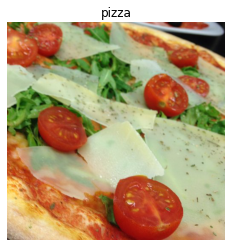

In [11]:
# view a random image from the training dataset
img =view_random_image(target_dir="pizza_steak/train/",
                       target_class="pizza")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[122,  99,  29],
        [126, 102,  30],
        [135, 107,  34],
        ...,
        [ 20,  19,  24],
        [ 21,  20,  25],
        [ 21,  20,  26]],

       [[117,  93,  21],
        [120,  96,  24],
        [127, 101,  26],
        ...,
        [ 21,  20,  25],
        [ 22,  21,  26],
        [ 22,  21,  26]],

       [[114,  86,  13],
        [114,  88,  14],
        [115,  93,  17],
        ...,
        [ 22,  22,  24],
        [ 23,  22,  27],
        [ 24,  23,  28]],

       ...,

       [[ 74,  59,  56],
        [ 55,  40,  37],
        [ 53,  38,  33],
        ...,
        [202, 176, 143],
        [204, 178, 145],
        [206, 180, 147]],

       [[ 89,  73,  73],
        [ 78,  62,  62],
        [ 66,  51,  48],
        ...,
        [201, 175, 142],
        [202, 176, 143],
        [205, 179, 146]],

       [[108,  92,  93],
        [ 88,  72,  72],
        [ 76,  61,  58],
        ...,
        [200, 174, 14

In [13]:
# view the image shape
img.shape # return width, height, colour channels

(512, 512, 3)

In [14]:
#get all the pixel values between 0 and 1
img/255.

array([[[0.47843137, 0.38823529, 0.11372549],
        [0.49411765, 0.4       , 0.11764706],
        [0.52941176, 0.41960784, 0.13333333],
        ...,
        [0.07843137, 0.0745098 , 0.09411765],
        [0.08235294, 0.07843137, 0.09803922],
        [0.08235294, 0.07843137, 0.10196078]],

       [[0.45882353, 0.36470588, 0.08235294],
        [0.47058824, 0.37647059, 0.09411765],
        [0.49803922, 0.39607843, 0.10196078],
        ...,
        [0.08235294, 0.07843137, 0.09803922],
        [0.08627451, 0.08235294, 0.10196078],
        [0.08627451, 0.08235294, 0.10196078]],

       [[0.44705882, 0.3372549 , 0.05098039],
        [0.44705882, 0.34509804, 0.05490196],
        [0.45098039, 0.36470588, 0.06666667],
        ...,
        [0.08627451, 0.08627451, 0.09411765],
        [0.09019608, 0.08627451, 0.10588235],
        [0.09411765, 0.09019608, 0.10980392]],

       ...,

       [[0.29019608, 0.23137255, 0.21960784],
        [0.21568627, 0.15686275, 0.14509804],
        [0.20784314, 0

## An end to end example

let's build a convolutional neural network to find pattern in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

p/s: make sure to use runtime type GPU

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#set random seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#build CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 205ms/step - loss: 0.5601 - accuracy: 0.7073 - val_loss: 0.4119 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4170 - accuracy: 0.8087 - val_loss: 0.3257 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4007 - accuracy: 0.8227 - val_loss: 0.3255 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3439 - accuracy: 0.8560 - val_loss: 0.2921 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2944 - accuracy: 0.8813 - val_loss: 0.2947 - val_accuracy: 0.8620


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [ ]:
tf.random.set_seed(42)

#create a model to replicate
model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile model
model_2.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2= model_2.fit(train_data,
            epochs=5,
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6962 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than model_1, model_2 performs terribly

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data,
                  epochs=5,
                  validation_data=valid_data,
                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 3.1188 - accuracy: 0.6253 - val_loss: 0.6579 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.7455 - accuracy: 0.7220 - val_loss: 0.6914 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6502 - accuracy: 0.7487 - val_loss: 0.5378 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.8989 - accuracy: 0.7207 - val_loss: 0.4546 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4526 - accuracy: 0.8007 - val_loss: 0.4332 - val_accuracy: 0.7880


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification 

1. Become one with data (visualize)

2. Preprocess the data(prepared it fdor the model, main step is scaling/normalize and turn it into batches)

3. create the model

4. fit the model

5. evaluate the model

6. adjust the different parameters and improve the model

7. repeat until satisfied (experiment)

### 1. Become one with the data

['1049459.jpg']
Image shape: (512, 512, 3)
['395960.jpg']
Image shape: (384, 512, 3)


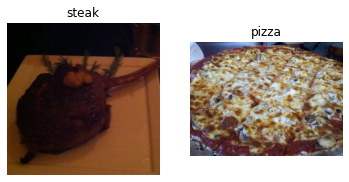

In [16]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [17]:
#define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir= "pizza_steak/test/"

next step is to turn our data into **batches**.

a batch is a small subset of data. rather than look at all -10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?
because 32 is good for your health

In [ ]:
!nvidia-smi

Wed Feb 16 07:19:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [19]:
#Load on our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# get a sample of a train data batch
images, labels = train_data.next() # get the "next"batch of images/labels in tratn_data
len(images), len(labels)

(32, 32)

In [21]:
#how many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (star with a baseline)

A baseline is  a relatively simple model or existing result that u setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note** In deep learning, there is almost an infinite amount of architectures u could create. so one of the best way to get started is to start woth something simple and see if it works on ur data and then introduce complexity as required (e.g look at which current model is performing best in the field for ur problem).

In [22]:
#make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
#create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
                      Conv2D(filters=10, #numeb rof sliding windows, higher is for complex model
                             kernel_size=3, # the size of the sliding window
                             strides=1, #the size of the step the sliding window takes across an input
                             padding="valid", #if same, output shape is same as input shape, if valid, output is compress
                             activation="relu",
                             input_shape=(224,224,3)), #input layer (specify input shape)
                      Conv2D(10,3, activation="relu"),
                      Conv2D(10,3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid") #output layer (working with binary classification so only 1 output neuron)
])

In [26]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
#check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [27]:
#fit the model
history_4= model_4.fit(train_data,
            epochs=5, 
            steps_per_epoch= len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 263ms/step - loss: 0.7588 - accuracy: 0.6607 - val_loss: 0.4328 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4365 - accuracy: 0.8087 - val_loss: 0.3398 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3376 - accuracy: 0.8600 - val_loss: 0.3386 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.2204 - accuracy: 0.9187 - val_loss: 0.3610 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.1235 - accuracy: 0.9593 - val_loss: 0.4113 - val_accuracy: 0.8340


### 5. Evaluate our model



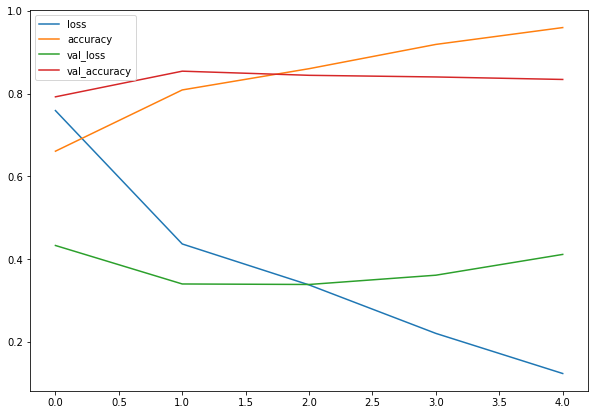

In [28]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))\


In [29]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training adn validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();



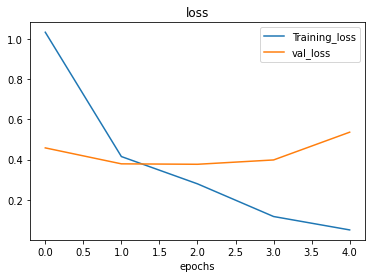

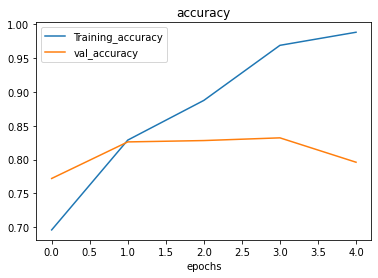

In [ ]:
#check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> when model validation loss is increasing, it is likely the model is overfitting.

### 6. Adjust the model parameters

fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the numebr of conv layers
* Increase the numebr of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers(MaxPool2D)
* Add more data..

> reducing overfitting is also known as **regularization**

In [ ]:
model_5=Sequential([
                    Conv2D(10, 3, activation="relu"),
                    MaxPool2D(pool_size=2),
                    Conv2D(10, 3, activation="relu"),
                    MaxPool2D(),
                    Conv2D(10, 3, activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1, activation="sigmoid")
])

In [ ]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#fit the model
history_5= model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5983 - accuracy: 0.7087 - val_loss: 0.4821 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4858 - accuracy: 0.7800 - val_loss: 0.3894 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4321 - accuracy: 0.8147 - val_loss: 0.4210 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4135 - accuracy: 0.8140 - val_loss: 0.3359 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3811 - accuracy: 0.8447 - val_loss: 0.3352 - val_accuracy: 0.8800


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

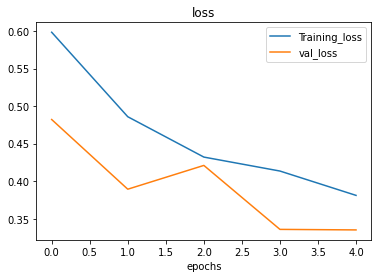

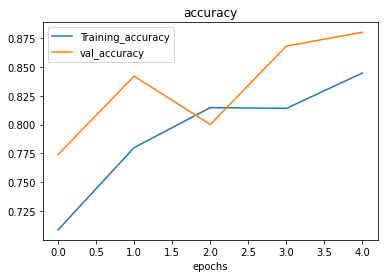

In [ ]:
#plot loss and accuracy curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [30]:
#Create imageDataGenerator training instance with data augmentation
train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, #how much do you want to rotate an image
                                            shear_range=0.2, # how much do you want to shear an image
                                            zoom_range=0.2, #zoom in randomly 
                                            width_shift_range=0.2, #move your images around x axis
                                            height_shift_range=0.2, #move your image around y axis
                                            horizontal_flip=True)

#create ImageDataGenerator without data augmentation
train_datagen= ImageDataGenerator(rescale=1/255.)

#create ImageDataGenerator without data augmentation for test dataset
test_datagen= ImageDataGenerator(rescale=1/255.)

> Data augmentation is a process of altering our training data, leading it to have more diversity and in turn allowing our modes to learn more generalizable patterns. Altering might mean adjusting the rotatin of an image, flipping it, cropping it oor something similar.

In [31]:
#import data and augment it from training directoory
print("Augmented training data: ")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)

#create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
#create non-augmented test data batches
print("Non-augmented test data: ")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=False)

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


> Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaoded into the model.

In [34]:
#get sample augmented data batches 
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented

show image number:  29


(-0.5, 223.5, 223.5, -0.5)

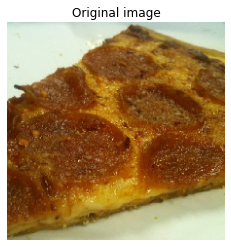

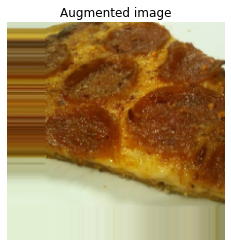

In [35]:
#show original imge and augmented image
import random
random_number = random.randint(0,32) #our batch size are 32
print("show image number: ",random_number)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
#create a model 
model_6=Sequential([
                    Conv2D(10, 3, activation="relu"),
                    MaxPool2D(pool_size=2),
                    Conv2D(10,3, activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3, activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1, activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6994 - accuracy: 0.4953 - val_loss: 0.6763 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.7037 - accuracy: 0.5133 - val_loss: 0.6638 - val_accuracy: 0.6240
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6757 - accuracy: 0.6280 - val_loss: 0.6268 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6353 - accuracy: 0.6533 - val_loss: 0.6070 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.7118 - accuracy: 0.5753 - val_loss: 0.5903 - val_accuracy: 0.7720


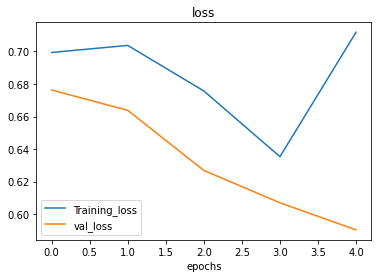

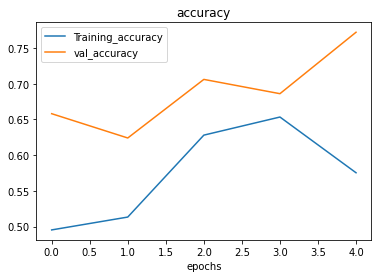

In [ ]:
#check our models training  curves
plot_loss_curves(history_6)

shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [36]:
#import data and augment it and shuffle form trianing directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=IMG_SIZE,
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [37]:
#create the model (same as model_5 and model_6)
model_7=Sequential([
                    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(10,3, activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1, activation="sigmoid")
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_7= model_7.fit(train_data_augmented_shuffled,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.6218 - accuracy: 0.6547 - val_loss: 0.5299 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5564 - accuracy: 0.7293 - val_loss: 0.4275 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4986 - accuracy: 0.7800 - val_loss: 0.4042 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4980 - accuracy: 0.7627 - val_loss: 0.4054 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 29s 627ms/step - loss: 0.4746 - accuracy: 0.7820 - val_loss: 0.3518 - val_accuracy: 0.8500


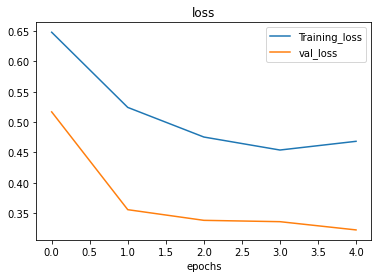

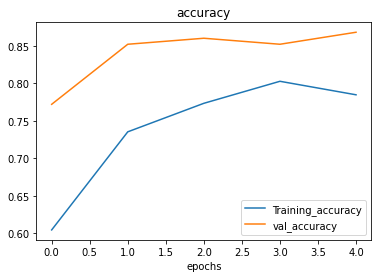

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (add more Conv2D / MaxPool2D layers)
* Increase the number of filters in each convolutional layer (from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model opportunities to learn).
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.


### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we are working with 
print(class_names)

['pizza' 'steak']


In [42]:
#view our examples image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak =mpimg.imread("03-steak.jpeg")

--2022-02-17 13:42:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-02-17 13:42:30 (32.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



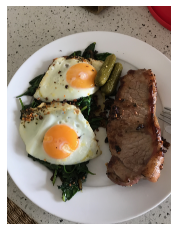

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(steak)
plt.axis(False);

In [ ]:
#check the shape of our image
steak.shape

(4032, 3024, 3)

> when you train a neural network and you want to make a prediction with it on your own custom data, it is important than your custom data (or new data) is preproceses into the same format as the data your model was trained on.

In [44]:
#create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  #Read in the image
  img=tf.io.read_file(filename)
  
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)

  #Resize the image
  img=tf.image.resize(img, size=[img_shape, img_shape])

  #Rescale the image (get all values between 0 and 1)
  img=img/255.
  return img


In [45]:
#Load in and preprocess our custom image
steak=load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [48]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

In [46]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [50]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [51]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  import an image located at filename, makes a prediction with model
  and plots the image with the predicted class with title
  """

  #import the target image and preprocess it
  img=load_and_prep_image(filename)

  #make a prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


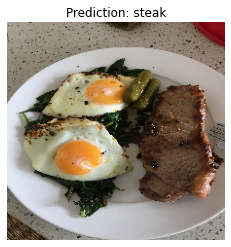

In [53]:
#test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2022-02-17 13:51:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-02-17 13:51:20 (41.9 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



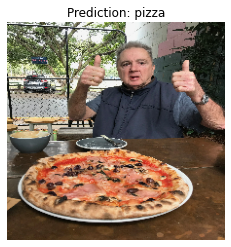

In [55]:
#download another custom image and make a prediction it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class image classification
we are going to step up things with 10 clases of food(multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (Start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model(try to beat tbaseline/ reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref =zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-16 07:25:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   311MB/s    in 1.6s    

2022-02-16 07:25:37 (311 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 

#walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 16 07:25 .
drwxr-xr-x  1 root root 4096 Feb 16 07:25 ..
drwxr-xr-x 12 root root 4096 Feb 16 07:25 test
drwxr-xr-x 12 root root 4096 Feb 16 07:25 train


In [ ]:
#Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
#get the class names
import pathlib
import numpy as np
data_dir =pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['982714.jpg']
Image shape: (512, 512, 3)


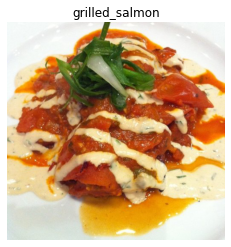

In [ ]:
#Visualize
import random
img =view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

#load data in from directories and turn it into batches
train_data= train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [ ]:
#create model
model_8=Sequential([
                    Conv2D(10, 3,input_shape=(224,224,3)),
                    Activation(activation="relu"),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3, activation="relu"),
                    Conv2D(10,3, activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10, activation="softmax") #changed to have 10 output neurons and use softmax activation function
])

#compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_8= model_8.fit(train_data, #now use 10 classes
                       epochs=5,
                       steps_per_epoch=(len(train_data)),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.1390 - accuracy: 0.2232 - val_loss: 1.9416 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.8451 - accuracy: 0.3633 - val_loss: 1.8518 - val_accuracy: 0.3552
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.4562 - accuracy: 0.5112 - val_loss: 1.9786 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 0.8609 - accuracy: 0.7291 - val_loss: 2.4019 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.3245 - accuracy: 0.9021 - val_loss: 3.4944 - val_accuracy: 0.2880


### 5.Evaluate the model

In [ ]:
#evaluate the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 3.4944 - accuracy: 0.2880


[3.4944252967834473, 0.2879999876022339]

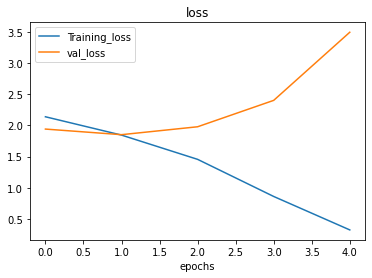

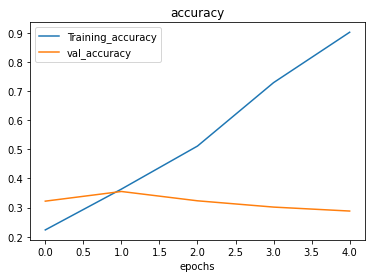

In [ ]:
#check out the model loss curves for 10 classes
plot_loss_curves(history_8)

our model is overfitting because it gets great training resutl but fails to generalize well to unseen data and get poor test result.

### 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

fix overfitting by:
1. Get more data
2. Simplify the model (model too complicated due to too many layers. to fix this: reduce the number of layers or hidden units in layers)
3. Use data augmentation (manipulate training data)
4. use transfer learning 

In [ ]:
#try simplify our model
#remove 2 convolutional layers
model_9=Sequential([
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 2.1914 - accuracy: 0.2132 - val_loss: 1.9744 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8702 - accuracy: 0.3475 - val_loss: 1.9022 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.5616 - accuracy: 0.4732 - val_loss: 1.9243 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 1.1501 - accuracy: 0.6261 - val_loss: 2.0680 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 53s 227ms/step - loss: 0.7260 - accuracy: 0.7829 - val_loss: 2.4507 - val_accuracy: 0.3060


### Trying to reduce overfitting with data augmentation

ideally we want to:
* Reduce overfitting (get train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
#create an augmented training
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_8) #copy model_8

#compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [ ]:
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 469ms/step - loss: 2.1986 - accuracy: 0.1829 - val_loss: 2.1000 - val_accuracy: 0.2272
Epoch 2/5
235/235 [==============================] - 109s 465ms/step - loss: 2.0938 - accuracy: 0.2455 - val_loss: 2.0083 - val_accuracy: 0.2780
Epoch 3/5
235/235 [==============================] - 110s 466ms/step - loss: 2.0469 - accuracy: 0.2821 - val_loss: 1.9263 - val_accuracy: 0.3212
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0137 - accuracy: 0.2975 - val_loss: 1.8400 - val_accuracy: 0.3676
Epoch 5/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9672 - accuracy: 0.3180 - val_loss: 1.8147 - val_accuracy: 0.3724


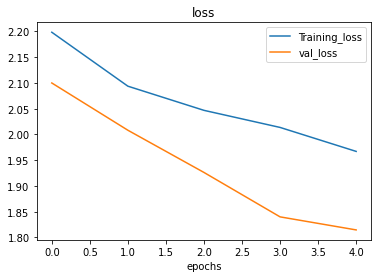

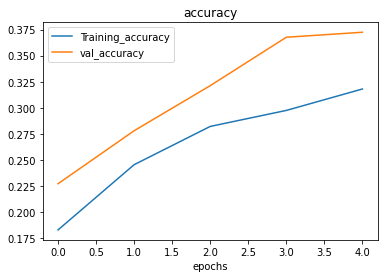

In [ ]:
#check out loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied


####Making a prediction with our trained model

In [ ]:
#remind ourselved of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Download our custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-02-16 07:54:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-02-16 07:54:11 (41.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-02-16 07:54:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):

  #import the target image and preprocess it
  img=load_and_prep_image(filename)

  #make prediction
  pred=model.predict(tf.expand_dims(img, axis=0))

  #add in logic for multi-class
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]


  #plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

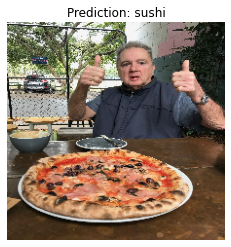

In [ ]:
# make a prediction using model_10
pred_and_plot(model=model_10,
          filename="03-pizza-dad.jpeg",
          class_names=class_names)

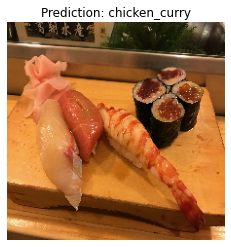

In [ ]:
pred_and_plot(model=model_10,
          filename="03-sushi.jpeg",
          class_names=class_names)

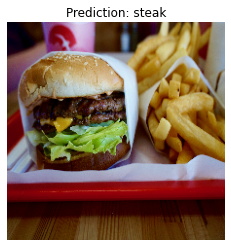

In [ ]:
pred_and_plot(model=model_10,
          filename="03-hamburger.jpeg",
          class_names=class_names)

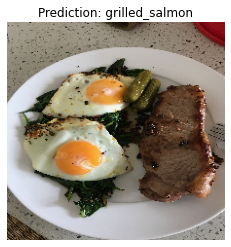

In [ ]:
pred_and_plot(model=model_10,
          filename="03-steak.jpeg",
          class_names=class_names)

our model perform poor on our custom image because of its low accuracy

### Saving and loading our model

In [ ]:
#save our model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
#load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 15s 190ms/step - loss: 1.8147 - accuracy: 0.3724


[1.814703106880188, 0.3723999857902527]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.8147 - accuracy: 0.3724


[1.814703106880188, 0.3723999857902527]